In [35]:
%load_ext autoreload
%autoreload 2

In [125]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pylib.style as pys
import pylib.preprocess as preprocess
import pylib.statistics as stat
%matplotlib inline

In [104]:
multi_df = uproot.open('../trees/19/multihadrons.root')['t']
df = preprocess.read_tree(multi_df, mc=True)

## Как распределён фон по мультиадронному генератору

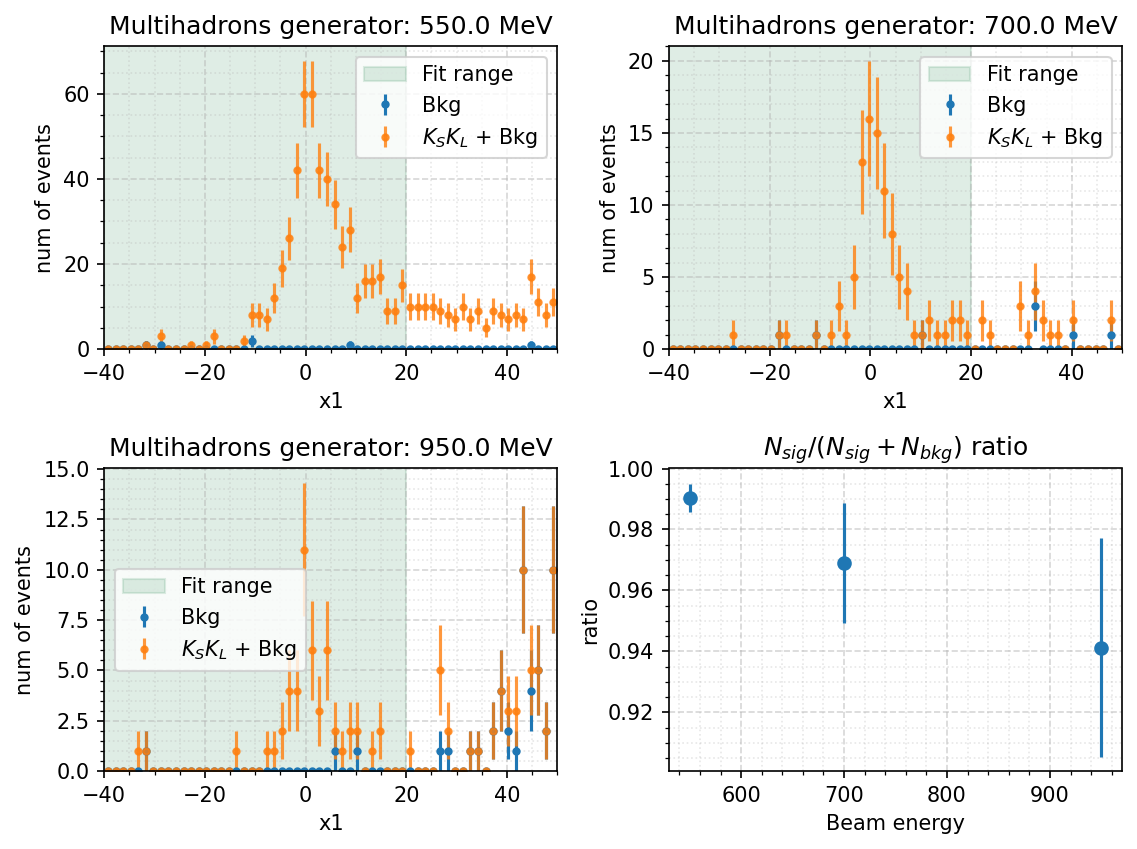

In [128]:
energies = sorted(set(df.index))
plt.figure(dpi=150, figsize=(1.2*6.4, 1.2*4.8))
xmin_fit, xmax_fit = -40, 20
num_sig, num_all = [], []
for i, e in enumerate(energies):
    plt.subplot(int(str(f"22{i+1}")))
    temp = df.loc[e].copy()
    sig = temp.query('sim_parts=="$K_L$$K_S$"')
    bkg = temp.query('sim_parts!="$K_L$$K_S$"')
    num_sig.append(len(sig.query('x1>@xmin_fit&x1<@xmax_fit')))
    num_all.append(len(temp.query('x1>@xmin_fit&x1<@xmax_fit')))
    bins, hist_range = 60, (-40, 50)
    pys.hep_histo(bkg.x1, bins=bins, range=hist_range, label='Bkg')
    pys.hep_histo(temp.x1, bins=bins, range=hist_range, label='$K_SK_L$ + Bkg', alpha=0.8)
    plt.ylim(0, None)
    plt.xlim(*hist_range)
    plt.fill_betweenx([0, 1e5], xmin_fit, xmax_fit, alpha=0.15, color='seagreen', label='Fit range')
    pys.my_style(f'Multihadrons generator: {temp.index[0]} MeV', 'x1', 'num of events', legend=True)
    del temp, sig
plt.subplot(224)
num_sig, num_all = np.array(num_sig), np.array(num_all)
plt.errorbar(energies, num_sig/num_all, yerr=stat.efficiency_error(num_sig, num_all), fmt='o');
pys.my_style('$N_{sig}/(N_{sig} + N_{bkg})$ ratio', 'Beam energy', 'ratio', legend=False, ylim=(None, 1))
# plt.savefig('./images/multics.png')